In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [15]:
# Load the dataset
data = pd.read_csv("Telco_Customer_Churn.csv")
print("Data +Shape:", data.shape)
data.head()  # Display the first few rows of the dataset


Data +Shape: (1000, 7)


,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,CUST1,Male,0,48,106.17,5133.13,No
1,CUST2,Female,0,66,79.03,5256.80,No
2,CUST3,Male,0,70,42.63,2963.57,Yes
3,CUST4,Male,0,28,58.42,1610.39,No
4,CUST5,Male,0,26,65.01,1605.26,No


In [16]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Convert 'TotalCharges' to numeric, handling errors by coercing them to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing 'TotalCharges' values
data.dropna(subset=['TotalCharges'], inplace=True)
print("Data Shape after cleaning:", data.shape)


Missing values:
 customerID        0
gender            0
SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64
Data Shape after cleaning: (1000, 7)


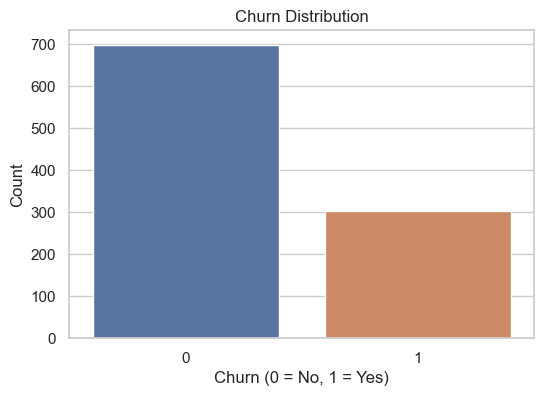

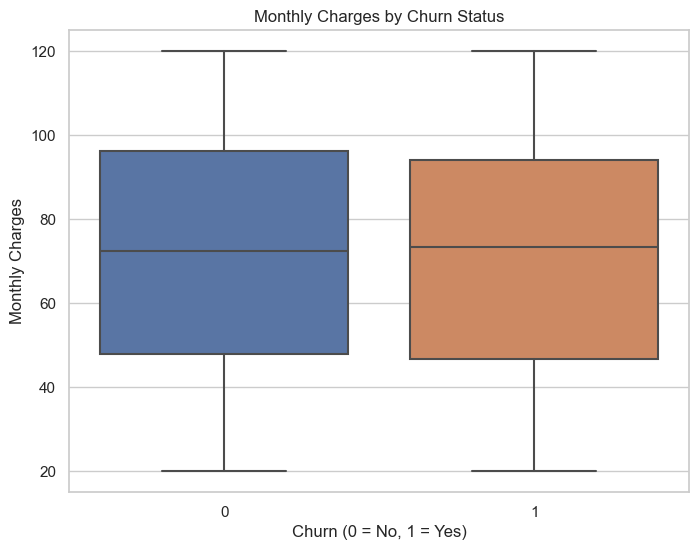

C:\Users\rutur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


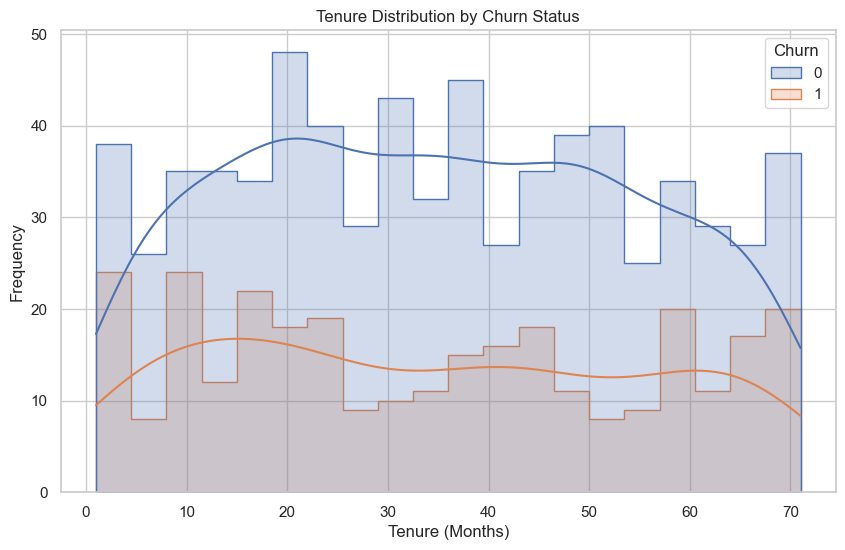

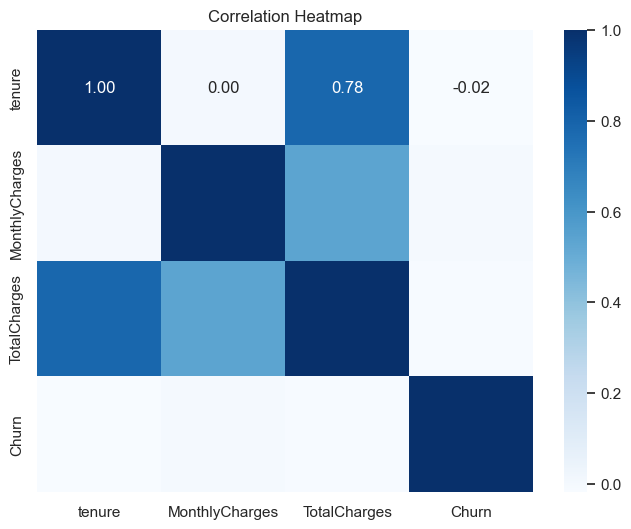

C:\Users\rutur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


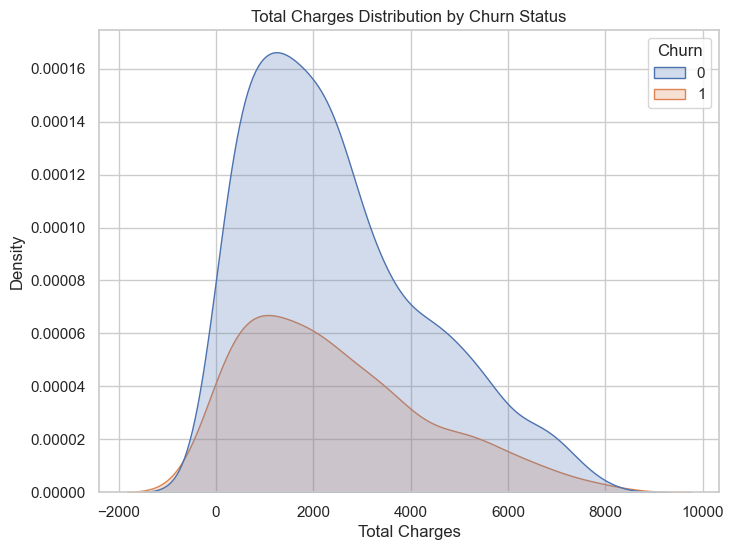

In [17]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert 'Churn' column to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Set style for plots
sns.set(style="whitegrid")

# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2. Monthly Charges by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()

# 3. Tenure distribution for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', hue='Churn', bins=20, kde=True, element="step")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 5. Distribution of Total Charges by Churn Status
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='TotalCharges', hue='Churn', fill=True)
plt.title("Total Charges Distribution by Churn Status")
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.show()


In [18]:
# Encode 'gender' and 'Churn' columns
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select features (X) and target variable (y)
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']


In [19]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[300]]


In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[300]]


In [24]:
import joblib

# Save the model to a file
joblib.dump(model, 'churn_model.pkl')

# To load the model later, use:
# loaded_model = joblib.load('churn_model.pkl')


['churn_model.pkl']